# DATA2001 Assignment 1

Name: Duc Thanh Nguyen

Student number: 46724470

## 1. Data Prepation

In [38]:
import pandas as pd
import squarify 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [39]:
#read & show data
seed_data = pd.read_csv("Seed_dataset_v1.csv")
seed_data.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


In [40]:
seed_data.shape

(210, 8)

In [41]:
seed_data.info

<bound method DataFrame.info of       area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0    15.26      14.84       0.8710           5.763          3.312   
1    14.88      14.57       0.8811           5.554          3.333   
2    14.29      14.09       0.9050           5.291          3.337   
3    13.84      13.94       0.8955           5.324          3.379   
4    16.14      14.99       0.9034           5.658          3.562   
..     ...        ...          ...             ...            ...   
205  12.19      13.20       0.8783           5.137          2.981   
206  11.23      12.88       0.8511           5.140          2.795   
207  13.20      13.66       0.8883           5.236          3.232   
208  11.84      13.21       0.8521           5.175          2.836   
209  12.30      13.34       0.8684           5.243          2.974   

     asymmetryCoefficient  lengthOfKernelGroove  seedType  
0                   2.221                 5.220      Kama  
1                  

In [42]:
#identify missing values
seed_data.isna().sum()

area                    1
perimeter               1
compactness             7
lengthOfKernel          1
widthOfKernel           1
asymmetryCoefficient    2
lengthOfKernelGroove    8
seedType                0
dtype: int64

In [43]:
#handle data with missing value: Mean imputation since it will affect the analysis in minimal
non_missing_area= np.round(seed_data[seed_data.notna()]["area"].mean())
non_missing_perimeter = np.round(seed_data[seed_data.notna()]['perimeter'].mean())
non_missing_length_Kernal = np.round(seed_data[seed_data.notna()]['lengthOfKernel'].mean())
non_missing_width = np.round(seed_data[seed_data.notna()]['widthOfKernel'].mean())
non_missing_compactness = np.round(seed_data[seed_data.notna()]['compactness'].mean())
non_missing_asymmetryCoefficient= np.round(seed_data[seed_data.notna()]['asymmetryCoefficient'].mean())
not_missing_length_KG = np.round(seed_data[seed_data.notna()]['lengthOfKernelGroove'].mean())

In [44]:
# fill missing values with the above mean
seed_data["area"].fillna(non_missing_area, inplace=True)
seed_data["perimeter"].fillna(non_missing_perimeter ,inplace=True)
seed_data["lengthOfKernel"].fillna(non_missing_length_Kernal,inplace=True)
seed_data["widthOfKernel"].fillna(non_missing_width, inplace = True)
seed_data["compactness"].fillna(non_missing_compactness, inplace = True)
seed_data["asymmetryCoefficient"].fillna(non_missing_asymmetryCoefficient, inplace = True)
seed_data["lengthOfKernelGroove"].fillna(not_missing_length_KG, inplace = True)


In [45]:
seed_data.isna().sum()

area                    0
perimeter               0
compactness             0
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    0
lengthOfKernelGroove    0
seedType                0
dtype: int64

Explain: 
- Handing data by mean reduces the risk of loss of information
- Mean imputation can apply to multiple situations and the seed dataset contains mostly numerical data
- With not a large amount of missing data compared to the total amount of data, mean imputation is a reasonable method

## 2. Exploratory Data Analysis (EDA)

## 2.1 Univariate EDA

### Column 'area'

In [46]:
seed_data["area"].describe()

count    210.000000
mean      14.865714
std        2.898581
min       10.590000
25%       12.315000
50%       14.375000
75%       17.305000
max       21.180000
Name: area, dtype: float64

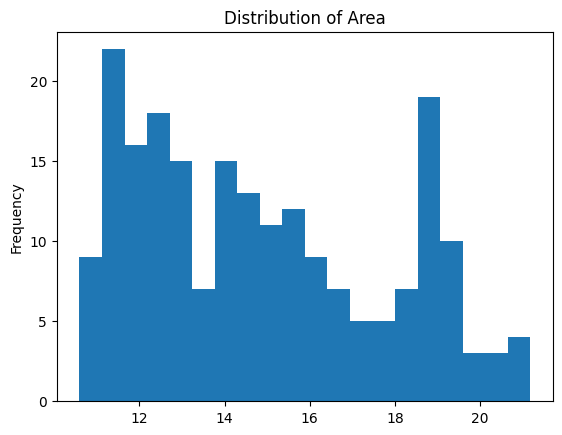

In [47]:
seed_data["area"].plot.hist(grid=False, bins=20, title="Distribution of Area");

<p>Observations: <p>
<p>- In the "area" histogram, the data appears left skwewd.<p> 
<p>- There is a peak in the distribution less than 12.<p>
<p>Findings: The majority of data points have smaller values of "area" compared to the mean or median.<p>

### Column 'Perimeter'

In [48]:
seed_data['perimeter'].unique

<bound method Series.unique of 0      14.84
1      14.57
2      14.09
3      13.94
4      14.99
       ...  
205    13.20
206    12.88
207    13.66
208    13.21
209    13.34
Name: perimeter, Length: 210, dtype: float64>

In [49]:
seed_data['perimeter'].describe()

count    210.000000
mean      14.570857
std        1.298995
min       12.410000
25%       13.452500
50%       14.360000
75%       15.715000
max       17.250000
Name: perimeter, dtype: float64

<Axes: title={'center': 'Distribution of Perimeter'}>

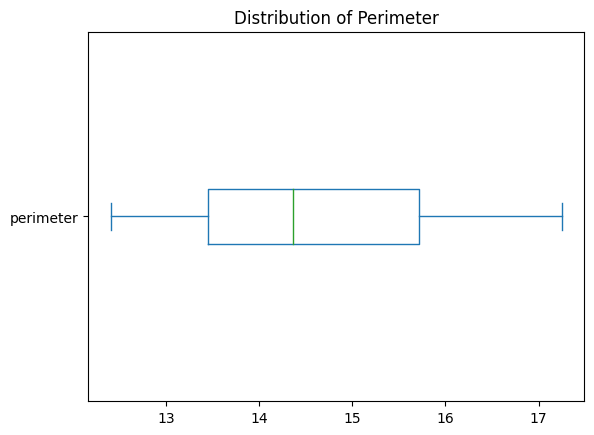

In [50]:
seed_data["perimeter"].plot.box(vert=False, title="Distribution of Perimeter")

<p>Observations: <p>
<p>- Median perimeter of the kernel samples is nearly 14.5 units, suggesting that over 50% of the kernel samples have a perimeter over 14.5 units<p>
<p>- The spread of the box varies from around 13.5 to around 15.75, indicating a major variability in perimeter values<p>

### Column 'Compactness'

In [51]:
seed_data["compactness"].describe()

count    210.000000
mean       0.875366
std        0.032931
min        0.808100
25%        0.857600
50%        0.874850
75%        0.889350
max        1.000000
Name: compactness, dtype: float64

<Axes: title={'center': 'Distribution of compactness'}, ylabel='Frequency'>

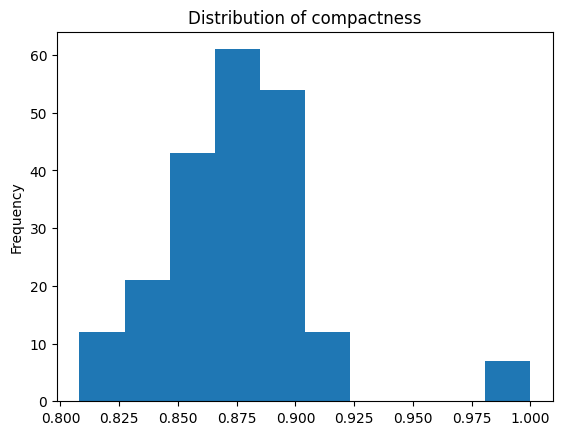

In [52]:
seed_data["compactness"].plot.hist(grid=False, bins=10, title="Distribution of compactness")

<p>Observations: <p>
<p>- In the "compactness" histogram, the data appears slightly left skwewd.<p> 
<p>- There is a peak in the distribution of 0.875 value.<p>
<p>- There is a gap between approximately 0.925 and approximately 0.98 with the max value of 1.0
<p>Findings: <p>
<p>- A gap indicates this specific range of compactness values is less common<p>
<p>- A high compactness close to 1 displays a high density<p>

### Column 'Asymmetry Coefficient'

In [53]:
seed_data["asymmetryCoefficient"].describe()

count    210.000000
mean       3.696277
std        1.501810
min        0.765100
25%        2.561500
50%        3.599000
75%        4.744750
max        8.456000
Name: asymmetryCoefficient, dtype: float64

<Axes: title={'center': 'Distribution of Asymmetry Coefficient'}, ylabel='Frequency'>

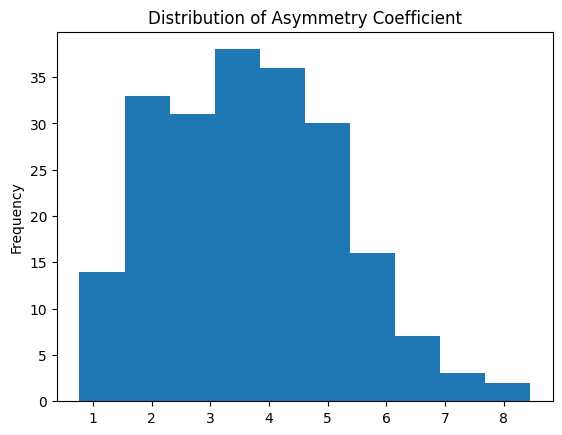

In [54]:
seed_data["asymmetryCoefficient"].plot.hist(grid=False, bins=10, title="Distribution of Asymmetry Coefficient")

<p>Insights: <p>
<p>- The density plot peaks at approximately 5.2<p> 
<p>- The plot is slightly left skewed<p>


### Column "lengthOfKernelGroove"

In [55]:
seed_data["lengthOfKernelGroove"].describe()

count    210.000000
mean       5.393624
std        0.492931
min        4.519000
25%        5.003000
50%        5.219000
75%        5.877000
max        6.550000
Name: lengthOfKernelGroove, dtype: float64

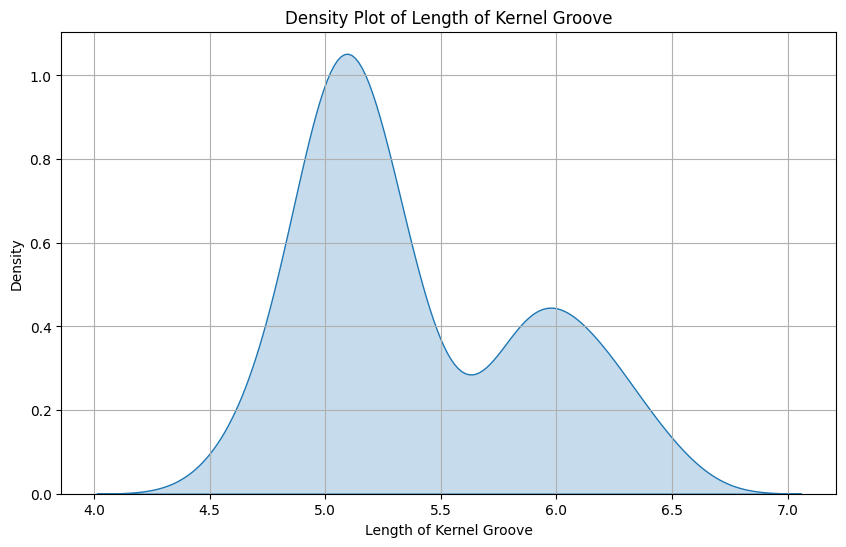

In [56]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=seed_data, x='lengthOfKernelGroove', fill=True)
plt.xlabel('Length of Kernel Groove')
plt.ylabel('Density')
plt.title('Density Plot of Length of Kernel Groove')
plt.grid(True)
plt.show()

<p>Observations: <p>
<p>- The density plot peaks at approximately 5.2<p> 
<p>- The plot is slightly left skewed<p>


### Column 'seedType'

<Axes: title={'center': 'Distribution of Seed Types'}, ylabel='proportion'>

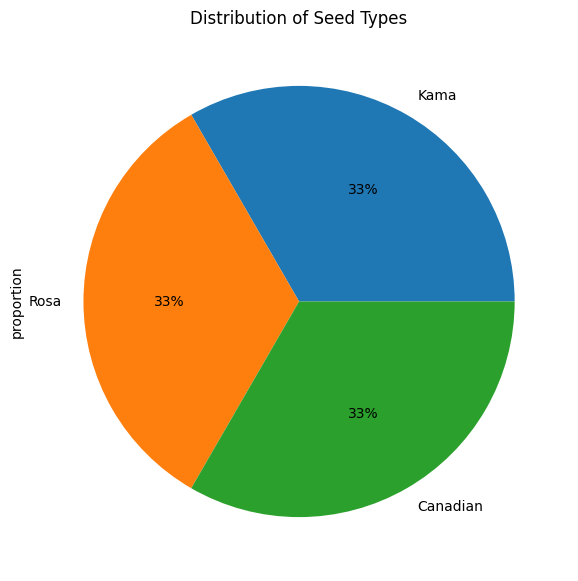

In [57]:
seed_type_distribution = seed_data["seedType"].value_counts(dropna=False, normalize=True)
plt.figure(figsize=(7, 7))
seed_type_distribution.plot.pie( autopct='%1.0f%%',pctdistance=0.6, radius=1, title="Distribution of Seed Types")

<p>Observations: <p>
<p>- The proportion of each seed type is equally distributed<p> 
<p>Findings: <p>
<p>- The equal distribution indicates that the sampling process was random and unbiased.  <p>

## 2.2 Bivariate EDA

Text(0.5, 1.0, 'Boxplot of compactness w.r.t seedType')

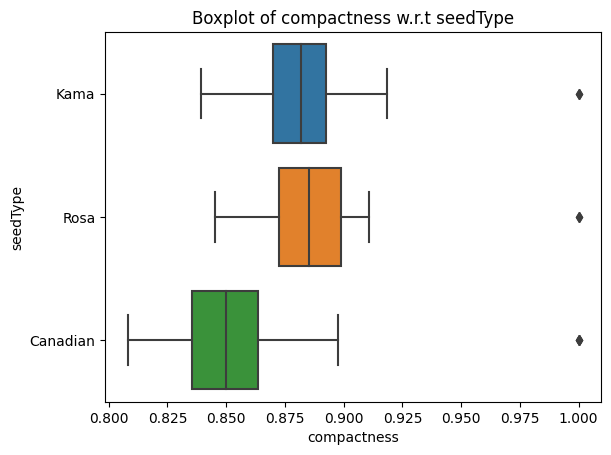

In [58]:
sns.boxplot(data=seed_data, x="compactness", y="seedType", orient="h")
plt.title("Boxplot of compactness w.r.t seedType")

<p>Observations: <p>
<p>- Canadian seed types has the longest whisker and longest length of box<p> 
<p>- Canadian has the lowest median at around 0.85 while Rosa has the highest median at around 0.89<p> 
<p>Findings: <p>
<p>- Canadian seed type has greater variability in compactness compared to Rosa and Kama<p>
<p>- The difference between compactness of Rosa and Canadian seed type is significant <p>

### Column "length_of_kernel, width_of_kernel"

In [59]:
seed_type_pivot_table_1 = seed_data.pivot_table(columns="seedType" , aggfunc="mean")
seed_type_pivot_table_1

seedType,Canadian,Kama,Rosa
area,11.928429,14.334429,18.334286
asymmetryCoefficient,4.776629,2.667403,3.644800
compactness,0.855399,0.883691,0.887007
lengthOfKernel,5.244071,5.508057,6.148029
lengthOfKernelGroove,5.116071,5.069086,5.995714
perimeter,13.282571,14.294286,16.135714
widthOfKernel,2.856486,3.244629,3.677414


In [60]:
seed_type_pivot_table_2 = seed_data.pivot_table(columns="seedType" , aggfunc="std")
seed_type_pivot_table_2

seedType,Canadian,Kama,Rosa
area,0.808931,1.215704,1.439496
asymmetryCoefficient,1.340198,1.173901,1.181868
compactness,0.037266,0.025764,0.024899
lengthOfKernel,0.162916,0.231508,0.268191
lengthOfKernelGroove,0.160015,0.253469,0.305555
perimeter,0.390313,0.576583,0.616995
widthOfKernel,0.148444,0.177616,0.185539


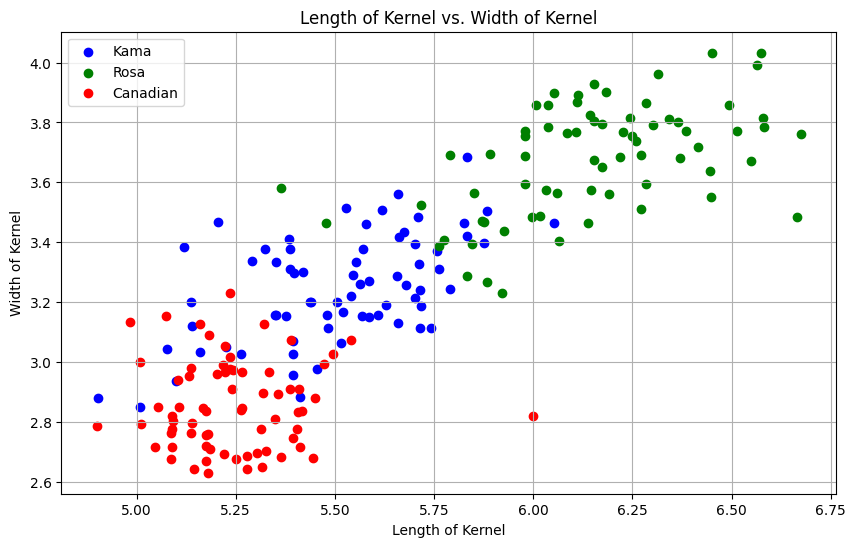

In [61]:
unique_seed_types = seed_data['seedType'].unique()
seed_type_colors = {
    'Kama': 'blue',
    'Rosa': 'green',
    'Canadian': 'red'
}
plt.figure(figsize=(10, 6))
for seed_type in unique_seed_types:
    subset_df = seed_data[seed_data['seedType'] == seed_type]
    plt.scatter(
        subset_df['lengthOfKernel'],
        subset_df['widthOfKernel'],
        color=seed_type_colors[seed_type],
        label=seed_type
    )
plt.xlabel('Length of Kernel')
plt.ylabel('Width of Kernel')
plt.title('Length of Kernel vs. Width of Kernel')
plt.legend()
plt.grid(True)
plt.show()

<p>Observations:<p>
<p>- There are 3 distinct clusters of data points based on seed types<p>
<p>- There are overlaps between "Kama & Canadian" and "Kama & Rosa" while there is no overlap between Rosa and Canadian
<p>- One canadian case can be identified as outlier with a length of 6.00 and width of around 2.8
<p>- A positive correlation between width and length display as length increase, width increases
<p>Findings <p>
<p>- The three seed types show distinguish features as Rosa shows wider and longer characteristics while Canadian has lowest values in width and length<p>
<p>- The outlier displays an extreme case which can be given a further analysis
<p>- Kama seed types spread out and show some overlap, which shows that Kama size can be similar to Canadian

In [62]:
numeric_data = seed_data[["area","perimeter","compactness","lengthOfKernel","widthOfKernel","asymmetryCoefficient","lengthOfKernelGroove"]]

numeric_data.corr().style.background_gradient(cmap='YlOrRd')

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove
area,1.000000,0.982023,0.444731,0.932636,0.969306,-0.225801,0.836526
perimeter,0.982023,1.000000,0.358556,0.971585,0.938214,-0.212948,0.864170
compactness,0.444731,0.358556,1.000000,0.253331,0.532994,-0.187472,0.158986
lengthOfKernel,0.932636,0.971585,0.253331,1.000000,0.849153,-0.166291,0.908915
widthOfKernel,0.969306,0.938214,0.532994,0.849153,1.000000,-0.255381,0.721281
asymmetryCoefficient,-0.225801,-0.212948,-0.187472,-0.166291,-0.255381,1.000000,0.010124
lengthOfKernelGroove,0.836526,0.864170,0.158986,0.908915,0.721281,0.010124,1.000000


<p>- Strong positive correlation: Area, Perimeter, LengthOfKernel, and WidthOfKernel
<P>- Weak positive correlation: compactness with other variables
<p>- Negative: asymmetryCoefficient with other variables

## 3. Mean and standard deviation of each type of measurement for each wheat variety 

In [63]:
mean_and_std_calculation = seed_data.groupby('seedType').agg(['mean', 'std'])
mean_and_std_calculation

area            perimeter           compactness            \
               mean       std       mean       std        mean       std   
seedType                                                                   
Canadian  11.928429  0.808931  13.282571  0.390313    0.855399  0.037266   
Kama      14.334429  1.215704  14.294286  0.576583    0.883691  0.025764   
Rosa      18.334286  1.439496  16.135714  0.616995    0.887007  0.024899   

         lengthOfKernel           widthOfKernel            \
                   mean       std          mean       std   
seedType                                                    
Canadian       5.244071  0.162916      2.856486  0.148444   
Kama           5.508057  0.231508      3.244629  0.177616   
Rosa           6.148029  0.268191      3.677414  0.185539   

         asymmetryCoefficient           lengthOfKernelGroove            
                         mean       std                 mean       std  
seedType                                                                
Canadian             4.776629  1.340198             5.116071  0.160015  
Kama                 2.667403  1.173901             5.069086  0.253469  
Rosa                 3.644800  1.181868             5.995714  0.305555

<p>Findings:<p>
<p>- Canadian possess smaller kernels compared to the other two but also displays less variability
<p>- Rosa has the highest mean in all categories, indicating its larger kornels <p>
<p>- Rosa also shows highest standard deviation in multiple categories, indicating its variability


## 4. Correlations among the numerical columns for each wheat variety

Regarding the scatter plot "Length of Kernel vs Width of Kernel", the trend indicates a linear & monotonic relationship. Therefore, applying Pearason Correlation Coefficient is a more appropriate method.

In [64]:
numeric_data = seed_data[["area","perimeter","compactness","lengthOfKernel","widthOfKernel","asymmetryCoefficient","lengthOfKernelGroove"]]

numeric_data.corr().style.background_gradient(cmap='YlOrRd')

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove
area,1.000000,0.982023,0.444731,0.932636,0.969306,-0.225801,0.836526
perimeter,0.982023,1.000000,0.358556,0.971585,0.938214,-0.212948,0.864170
compactness,0.444731,0.358556,1.000000,0.253331,0.532994,-0.187472,0.158986
lengthOfKernel,0.932636,0.971585,0.253331,1.000000,0.849153,-0.166291,0.908915
widthOfKernel,0.969306,0.938214,0.532994,0.849153,1.000000,-0.255381,0.721281
asymmetryCoefficient,-0.225801,-0.212948,-0.187472,-0.166291,-0.255381,1.000000,0.010124
lengthOfKernelGroove,0.836526,0.864170,0.158986,0.908915,0.721281,0.010124,1.000000


<p>Findings:<p>
<p>- Area, Perimeter, LengthOfKernel, and WidthOfKernel are strongly positively correlated. These measurements tend to increase together
<p>- lengthOfKernelGroove displays slightly weaker correlations with others, showing weaker linear relationship with other variables
<p>- Compactness shows relatively weaker correlations with others, showing weak linear relationships with the other variables.
<p>- AsymmetryCoefficient also shows weak correlations with other variables, displaying that it may not be strongly influenced by others<p>


## 5. K-means clustering on the data

In [65]:
seed_sample=seed_data[["lengthOfKernel","widthOfKernel"]]
K=3
Centroids=(seed_sample.sample(n=K))
print("Centroids: ")
print(Centroids)

Centroids: 
     lengthOfKernel  widthOfKernel
43            5.877          3.396
86            6.084          3.764
183           5.108          2.850


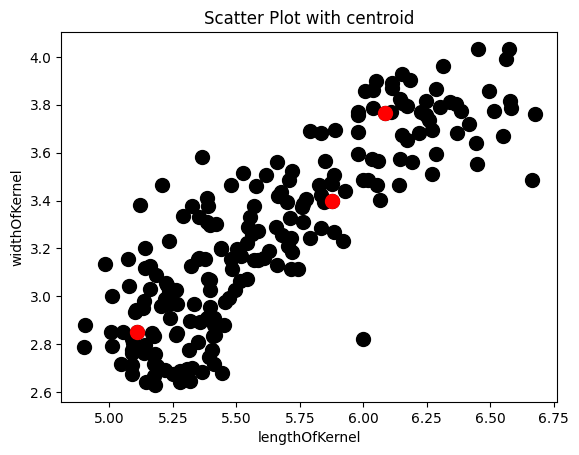

In [66]:
plt.scatter(seed_sample["lengthOfKernel"],seed_sample["widthOfKernel"],s = 100,c='black')
plt.scatter(Centroids["lengthOfKernel"],Centroids["widthOfKernel"],s = 100,c='red')
plt.xlabel('lengthOfKernel')
plt.ylabel('widthOfKernel')
plt.title("Scatter Plot with centroid")
plt.show()

In [67]:
def distance(obs):
    d = np.sqrt(((obs - Centroids) ** 2).sum(axis=1))
    return d.idxmin()

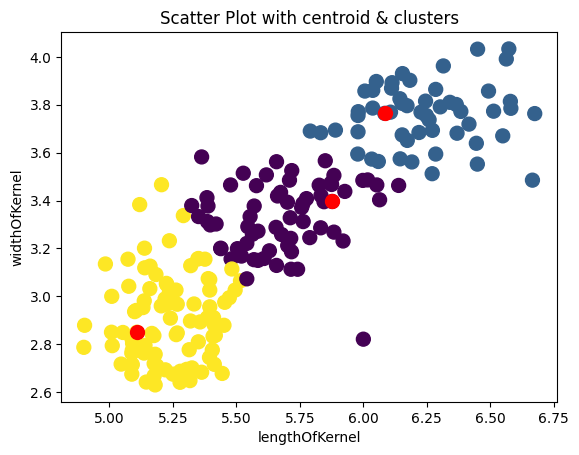

     lengthOfKernel  widthOfKernel
43            5.877          3.396
86            6.084          3.764
183           5.108          2.850


In [68]:
clusters = seed_sample.apply(distance, axis=1)

plt.scatter(seed_sample["lengthOfKernel"],seed_sample["widthOfKernel"],s = 100,c=clusters)
plt.scatter(Centroids["lengthOfKernel"],Centroids["widthOfKernel"],s = 100,c='red')
plt.xlabel('lengthOfKernel')
plt.ylabel('widthOfKernel')
plt.title("Scatter Plot with centroid & clusters")
plt.show()
plt.show()
print(Centroids)

In [69]:
Centroids = seed_sample.groupby(clusters).mean()
Centroids

,lengthOfKernel,widthOfKernel
43,5.679455,3.330061
86,6.238426,3.755111
183,5.236578,2.910411


<p>In the analysis, I determined the number of clusters as 3 using the "K-Means convergence criterion." The method involves running the K-Means clustering algorithm iteratively until the clusters no longer alter from one iteration to the next. The point at which the cluster assignments stabilize can be considered as the optimal numbers. <p>
<p> However, multiple limitations & uncertainties include: <p>
<p>- The impact of centroids affecting the solution<p>
<p>- Subjectivity of the method since multiple factors like the dataset or choice of distance metric might affect the stability <p>
<p>- More knowledge in the domain or other methods should be applied for evaluation<p>
<p>Although the K Mean Clustering method does not rely on EDA findings, the converged clusters align with insights from the initial data exploration with similar categorization of seed types with similar characteristics<p>


## 6. Principal component analysis

In [70]:
seed_data.shape

(210, 8)

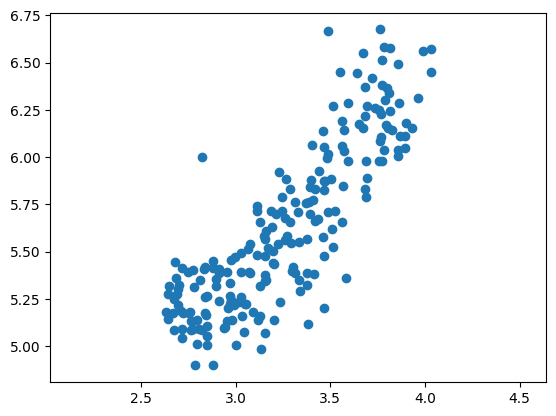

0.849152736273673


In [71]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = seed_data['widthOfKernel']

# Assign the 1st column of grains: length
length = seed_data['lengthOfKernel']

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)



In [72]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = seed_data.drop('seedType', axis=1)
y = seed_data['seedType']

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA with 2 components
n_components = 2
pca = PCA(n_components)
X_pca = pca.fit_transform(X_std)



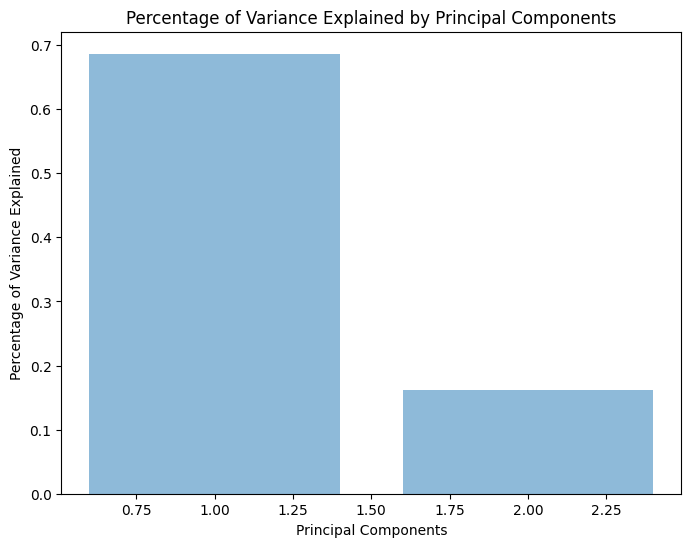

In [73]:
# Percentage of variance explained by each component

explained_variance_ratio = pca.explained_variance_ratio_

# Plot the percentage of variance explained by each principal component
plt.figure(figsize=(8, 6))
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variance Explained')
plt.title('Percentage of Variance Explained by Principal Components')
plt.show()



<p>Comments: <p>
<p>- Component 1 captures around 70% of the total variance in the data, displaying that it takes up the major source of variability and information <p>
<p>- Component 2 can still hold valuable information at around 30% of the total variance in the data<p>
<p>- Both components are important and influential to the evaluation of the dataset, however, component 1 might contain key factors in seed type classification, such as size, shape, or other physical attributes in additional to complementary information from component 2<p>


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_30388\2289566125.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, cmap='viridis')


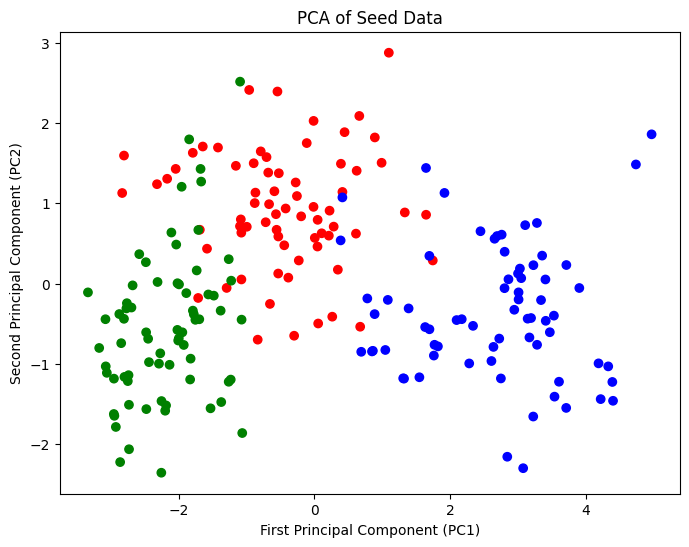

In [74]:
# Define a dictionary to map seed types to colors
seed_type_colors = {
    'Kama': 'red',  # You can specify desired colors for each seed type
    'Rosa': 'blue',
    'Canadian': 'green'
    # Add more seed types and colors as needed
}

# Create an array of colors based on 'seedType'
colors = [seed_type_colors[seed_type] for seed_type in seed_data['seedType']]

# Plot the first two principal components with custom colors
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, cmap='viridis')
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.title('PCA of Seed Data')
plt.show()


<p>Observations: <p>
<p>- There are 3 clear groupings of the data points<p>
<p>- Different seed types displays being distinguishable with each seed type is clustered in one region<p>
<p>Limitations: <p>
<p>- Linear technique therefore it might not display a complex relationship<p>
<p>- The number of Principal Components chosen might affect the results<p>